In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df=pd.read_csv('uber.csv')

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [7]:
df['key']=df['key'].str.extract(r'(\d+)').astype(float)
df['pickup_datetime']=df['pickup_datetime'].str.extract(r'(\d+)').astype(float)

In [8]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [9]:
df['dropoff_longitude']=df['dropoff_longitude'].fillna(df['dropoff_longitude'].mean())
df['dropoff_latitude']=df['dropoff_latitude'].fillna(df['dropoff_latitude'].mean())

In [10]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

Text(0.5, 1.0, 'Pickup Location by Fare amount')

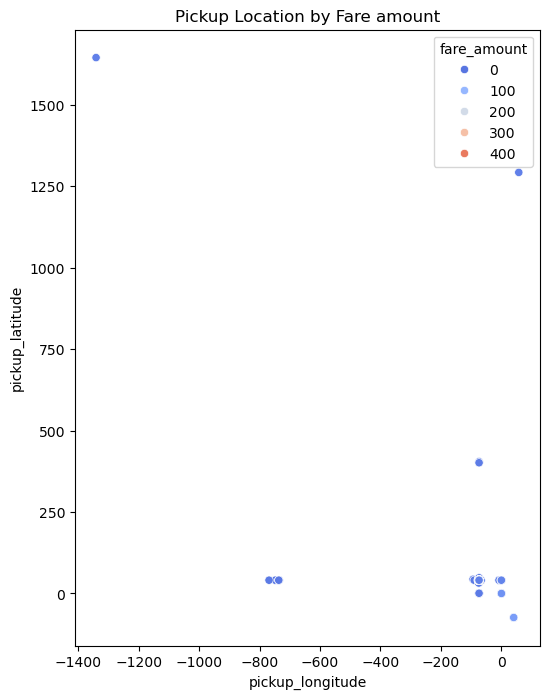

In [11]:
plt.figure(figsize=(6,8))
sns.scatterplot(x='pickup_longitude',y='pickup_latitude',data =df,hue='fare_amount',palette='coolwarm')
plt.title('Pickup Location by Fare amount')

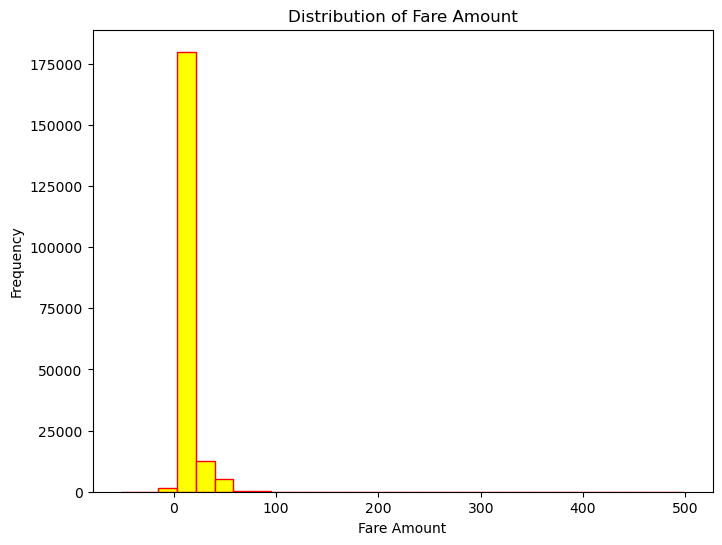

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(df['fare_amount'], bins=30, color='Yellow', edgecolor='red') 
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

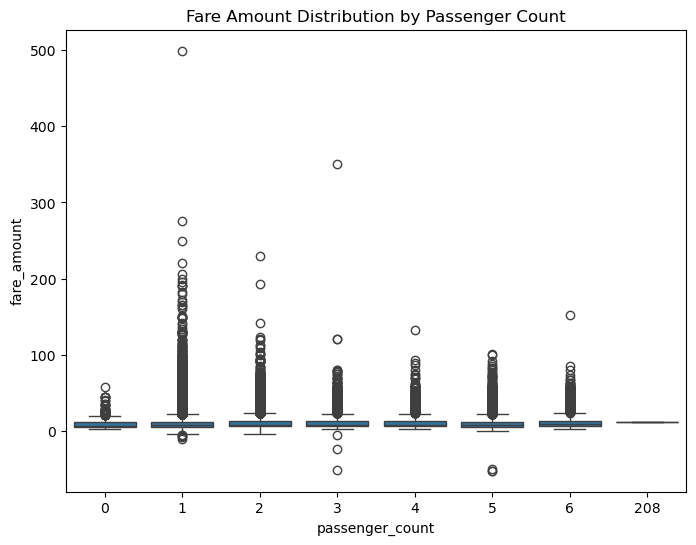

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=df)
plt.title('Fare Amount Distribution by Passenger Count')
plt.show()

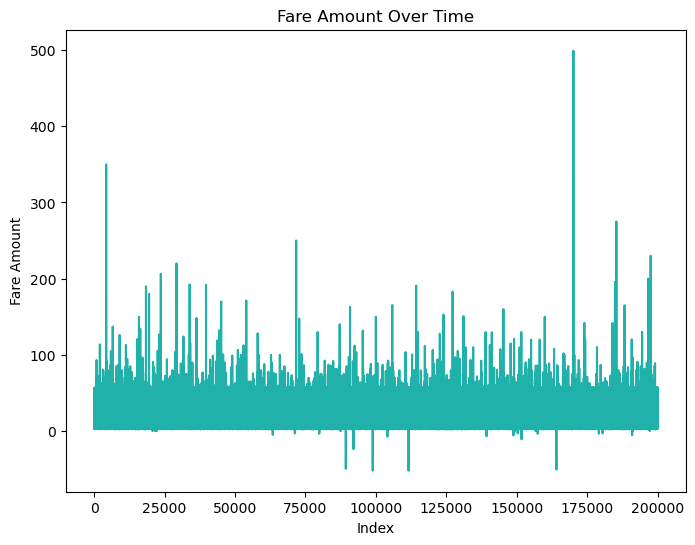

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(df.index, df['fare_amount'], color='lightseagreen')
plt.title('Fare Amount Over Time')
plt.xlabel('Index')
plt.ylabel('Fare Amount')
plt.show()

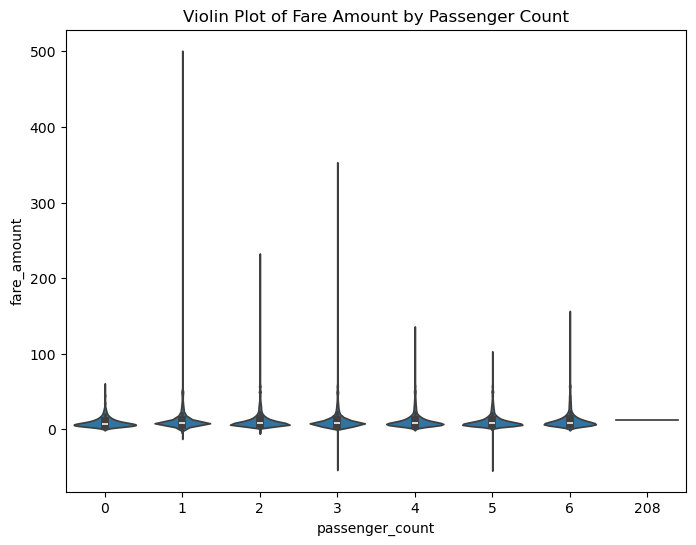

In [15]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='passenger_count', y='fare_amount', data=df)
plt.title('Violin Plot of Fare Amount by Passenger Count')
plt.show()

x=df.drop('fare_amount',axis=1)
y=df.fare_amount

In [16]:
x = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude','dropoff_latitude', 'passenger_count']]
y = df['fare_amount']

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2, random_state=42)

## ADABoostRegressor

In [18]:
model = AdaBoostRegressor(n_estimators=150,random_state=42)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred[0:10]
y_test[0:10]

119737     5.5
72272     45.0
158154     5.3
65426     32.3
30074      4.1
23677     12.0
134858    14.5
176418    12.1
132467     4.5
4082       7.7
Name: fare_amount, dtype: float64

In [19]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
r2=r2_score(y_test,y_pred)
print("R-squared (R2 Score):",r2)

Mean Squared Error (MSE): 61.55191786855294
R-squared (R2 Score): 0.42107477702715657


## LinearRegression

In [25]:
model1 = LinearRegression( )
model1.fit(x_train ,y_train)
y1_pred = model1.predict(x_test)
r2_score(y_test,y1_pred)
rmse = mean_squared_error(y_test, y1_pred, squared=False)
print("R² Score:", r2_score(y_test, y1_pred))

R² Score: 0.0003278992112039081


C:\Users\Supreeth\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Random Forest Regression

In [26]:
model = RandomForestRegressor()

In [27]:
model.fit(x_train,y_train)
accuracy=model.score(x_test,y_test)
print(f'Random Forest accuracy: {accuracy}')

Random Forest accuracy: 0.7014470028525823


## GradientBoostingRegressor

In [28]:
model = GradientBoostingRegressor()

In [29]:
model.fit(x_train,y_train)
accuracy = model.score(x_test,y_test)
print(f'Gradient Boosting accuracy:{accuracy}')

Gradient Boosting accuracy:0.65768350185107
